# Comparing Car Prices
*Pranav Shah*

## Introduction

In the following report we'll examine car prices by running several hypothesis tests to compare 1. normality and 2. means stratified by groups. We'll apply both graphical and formal hypothesis tests evaluations in our comparison of car price. 

## Summary

These are the key findings from this analysis:

- Log Prices are closer to a normal distribution than price. The KS test, QQ plots, and visual KS CDF comparisons helped make that determination.
- From a t-test we see that mean log price for apiration type is different but with low power.
- From a t-test we see that mean log price for fuel type has no statistical difference. 
- From a t-test we see that mean log price for fwd & rwd have a significant difference with high power.
- From the ANOVA we see that at least on mean difference exists for log prices within Body Styles.
- From Tukey's HSD test we see that the mean log price between sedans and hatchbacks are different, but the other comparisons are statistically no different.

The discussion sections below walk through these key points.


## Get Data

To start we'll get our automobile data from the a csv pre-loaded into the working folder. To prepare the data, we restructure a few columns to a numeric datatype and remove incomplete cases. Additionally, we'll add a log price column to our data and examine the overall structure of the data. 

In [5]:
# get data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()

auto.price$log.price <- log(auto.price$price) # add log price

str(auto.price)

Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

'data.frame':	195 obs. of  27 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

## Compare normality

In the following section we'll compare price and log price to a normal distribution. 

### Q-Q Plots
First, we'll look at this graphically through a Q-Q plot, which helps determine if price or log price come from similar distributions, in this case a normal distribution. When applying these plots we want to standardize price and log price through the scale function to make comparisons on a similar order. From the Q-Q plots below, we see that log price seems to be more normally distributed (right graph) because it follows the normal distribution line more closely than price, shown on the left.

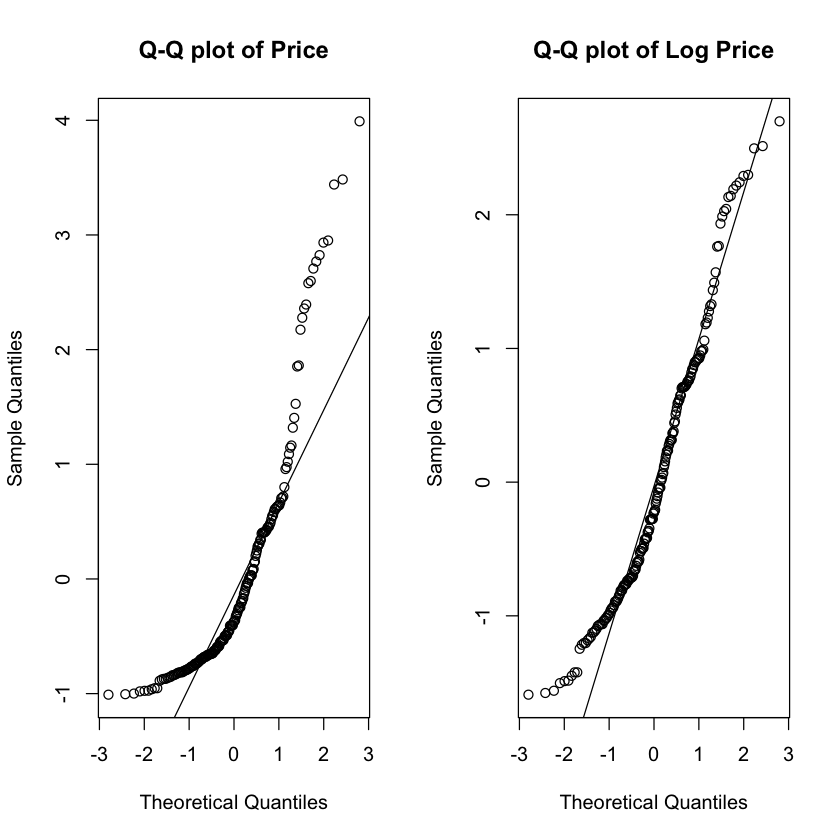

In [2]:
# Q-Q plots 
par(mfrow = c(1, 2))

qqnorm(scale(auto.price$price), main = 'Q-Q plot of Price')
qqline(scale(auto.price$price))

qqnorm(scale(auto.price$log.price), main = 'Q-Q plot of Log Price')
qqline(scale(auto.price$log.price))

par(mfrow = c(1, 1))

### Kolmogorov–Smirnov test

Next we'll use the Kolmogorov Smirnov tests to compare the both price and log price to a data set obtained randomly from a normal distribution. In this test we are comparing the cumulative density functions of both distributions and looking for the maximum deviation, which is the KS statistic.

#### Graphical assesment
The function below calculates the cumulative density functions for both input distributions and measures then returns the maximum difference between the two distributions. It can also plot the normal and price densities against each other. In the following example, the two side by side plots show that the price density function has a greater max difference between the random normal than the log price. Note that the black line is smaller in the right hand (log price) graph than the left hand, price graph. The calculated KS statistic that is printed also shows that log price is about 0.0667 vs. 0.179 for price. What this means is that the log price is more similar to normal distribution than price.

,KS Statistic
Price,0.17948718
log(Price),0.06666667


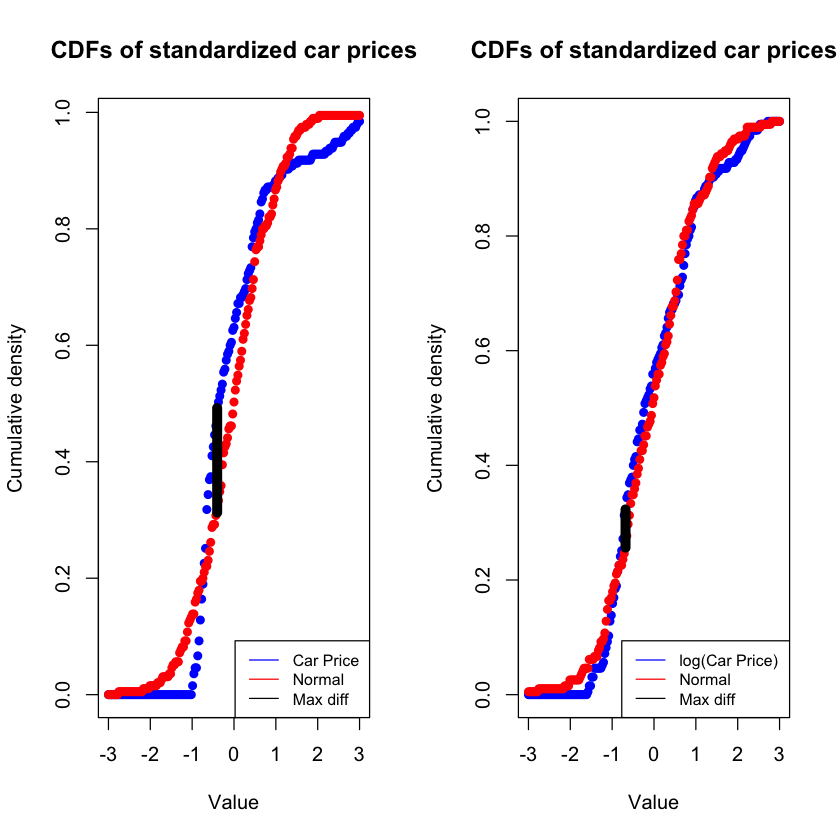

In [4]:
# Create k-s statistic function
ks_stat <- function(x_min,x_max, dist_a, dist_b, makeplot = FALSE, labels = c("Price","Normal Dist.")){
  x_seq <- seq(x_min,x_max,len=length(dist_a))
  # cumulative calculation 
  y_cdf1 <- sapply(x_seq, function(x){
    sum(dist_a<x)/length(dist_a)
  })
  y_cdf2 <- sapply(x_seq, function(x){
    sum(dist_b<x)/length(dist_b)
  })
  # max diff ks stat
  k_s_stat <- max(abs(y_cdf1-y_cdf2))
  
  # make cdf plot
  if (makeplot == TRUE){
    k_index <- which.max(abs(y_cdf1-y_cdf2))
    k_s_x <- x_seq[k_index]
    plot(x_seq,y_cdf1, col='blue', pch=16, main ='CDFs of standardized car prices', 
         xlab = 'Value', ylab = 'Cumulative density')
    points(x_seq,y_cdf2,col='red', pch=16) 
    lines(c(k_s_x,k_s_x), c(y_cdf1[k_index],y_cdf2[k_index]),
          col='black', lwd=8)
    legend("bottomright", legend = c(labels, c("Max diff")), col = c("blue", "red", "black"),lty = 1, cex = 0.8)
  }
  return(k_s_stat)
}

par(mfrow = c(1, 2))

dist_a <- scale(auto.price$price)
dist_b <- rnorm(length(auto.price$price), 0, 1)
a <- ks_stat(-3, 3, dist_a, dist_b, makeplot = TRUE, labels = c("Car Price", "Normal"))

dist_a <- scale(auto.price$log.price)
dist_b <- rnorm(length(auto.price$log.price), 0, 1)
b <- ks_stat(-3, 3, dist_a, dist_b, makeplot = TRUE, labels = c("log(Car Price)", "Normal"))

c <- as.data.frame(rbind(a,b))
row.names(c) <- c("Price", "log(Price)")
colnames(c) <- c("KS Statistic")
c

par(mfrow = c(1, 1))

#### KS statistic - Iterations 

Since the above function utilizes a random sampling from a normal distribution to compare to both the cumalitive densities of price and log price, it is important to run several iterations of the function above in order to get an averaged approximation of the KS statistic. From the histograms below we can get the mean of what the expected KS statistic would be for a price to normal distribution and log price to normal distribution. For price to a normal distribution, we see that the mean KS statistic is between .15 and .20, while for log price the mean KS statistic is between .10 and .15. This tends to confirm that it is likely that log price is more similar to a normal distribution than price is to a normal distribution.


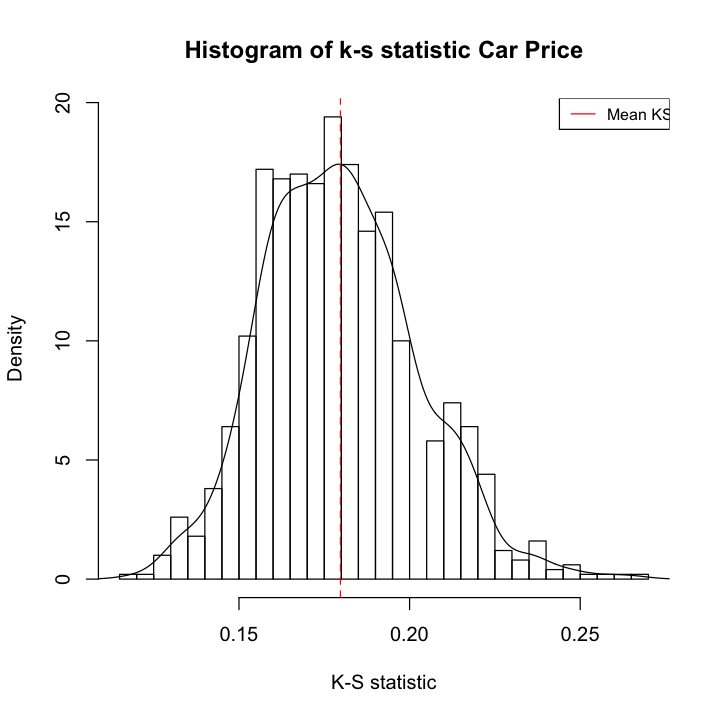

In [12]:
##----Repeat N Times-----
N <- 1000
k_s_rep <- sapply(1:N, function(i){
  dist_a <- scale(auto.price$price)
  dist_b <- rnorm(length(auto.price$price), 0, 1)
  return(ks_stat(-3, 3, dist_a, dist_b))
})

require(repr)
options(repr.plot.width=6, repr.plot.height=6)

# Draw histograms of iterations
hist(k_s_rep, breaks=30, freq=FALSE, xlab = 'K-S statistic',
     main = 'Histogram of k-s statistic Car Price')
lines(density(k_s_rep))
abline(v = mean(k_s_rep), col = c("red"), lty = 2)
legend("topright", legend = c("Mean KS"), col = c("red"),lty = 1, cex = 0.8)

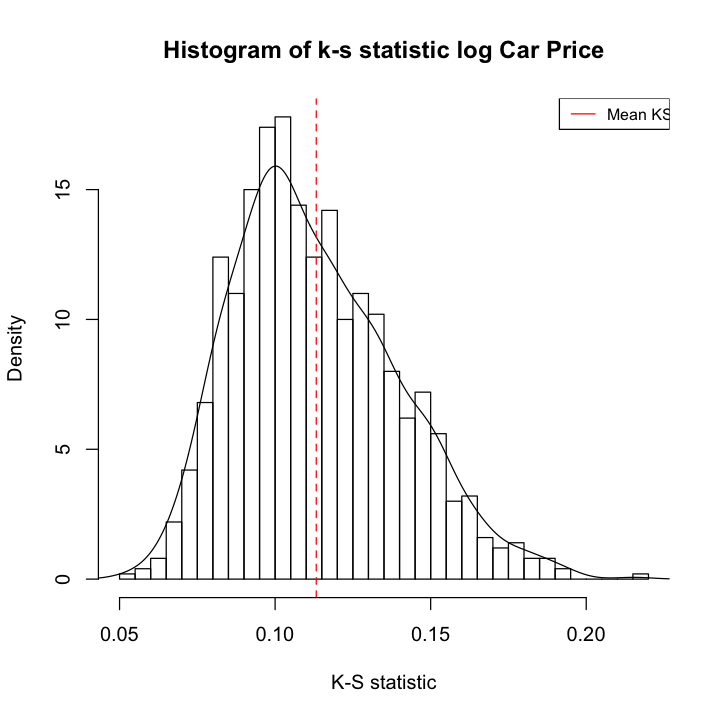

In [11]:
##----Repeat N Times-----
N <- 1000
k_s_rep <- sapply(1:N, function(i){
  dist_a <- scale(auto.price$log.price)
  dist_b <- rnorm(length(auto.price$log.price), 0, 1)
  return(ks_stat(-3, 3, dist_a, dist_b))
})

require(repr)
options(repr.plot.width=6, repr.plot.height=6)

# Draw histograms of iterations
hist(k_s_rep, breaks=30, freq=FALSE, xlab = 'K-S statistic',
     main = 'Histogram of k-s statistic log Car Price')
lines(density(k_s_rep))
abline(v = mean(k_s_rep), col = c("red"), lty = 2)
legend("topright", legend = c("Mean KS"), col = c("red"),lty = 1, cex = 0.8)

#### KS formal hypothesis test 

Using the formal hypothesis tests helps us approximate whether two distributions are drawn from the same distribution, in this case a normal distribution. When evaluating these tests, our null hypothesis is that the distributions are from the same reference distribution. A p-value of less than 0.05 tells us that we can reject the null hypothesis and accept that two comparison distributions are likely from different reference distributions. 

In the following two tests for price and log price compared to a random normal sample of the same length, the log price shows that we can not reject the null hypothesis (p-value = 0.13). This means we can accept that log price is from a normal distribution. When testing price against a random normal sample, we can reject the null (p-value = 2.3 e-4) meaning that price is from a different distribution.

From our graphical assesments and tests, we can conclude that log price is closer to a normal distribution than price, thus further analysis in this report will include only log price. 

In [21]:
#KS tests
ks.test(scale(auto.price$price), rnorm(length(auto.price$price), 0, 1), alternative = "two.sided")
ks.test(scale(auto.price$log.price), rnorm(length(auto.price$log.price), 0, 1), alternative = "two.sided")

Warning message in ks.test(scale(auto.price$price), rnorm(length(auto.price$price), :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  scale(auto.price$price) and rnorm(length(auto.price$price), 0, 1)
D = 0.21538, p-value = 0.0002357
alternative hypothesis: two-sided


Warning message in ks.test(scale(auto.price$log.price), rnorm(length(auto.price$log.price), :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  scale(auto.price$log.price) and rnorm(length(auto.price$log.price), 0, 1)
D = 0.11795, p-value = 0.1327
alternative hypothesis: two-sided


## Significance Tests

In the following section we'll examine means of log prices stratified by aspiration, fuel type, and drive wheels (fwd and rwd). Recall in the previous section we determined that standardized log prices is closer to a normal distribution than standardized prices, thus we'll only examine the means of the groups by log price. In all of the following comparisons we'll examine sample sizes, run a Welch's t-test, calculate power, and examine the necessary mean difference to get higher power. 

### Overview of Power

An important aspect of means testing is power or the probability of getting a positive result when the null hypothesis is not true. As power increases the false negative rate (type II error) decreases. The below graphs show a simple view power against sample size and mean differences. To get high power ~ 0.9, we need a mean difference of roughly 1.1 and a sample size of about 90. In general the greater the sample size and mean difference the greater the power.

Loading required package: pwr
Warning message:
"package 'pwr' was built under R version 3.3.3"Warning message in qt(sig.level/tside, nu, lower = FALSE):
"NaNs produced"

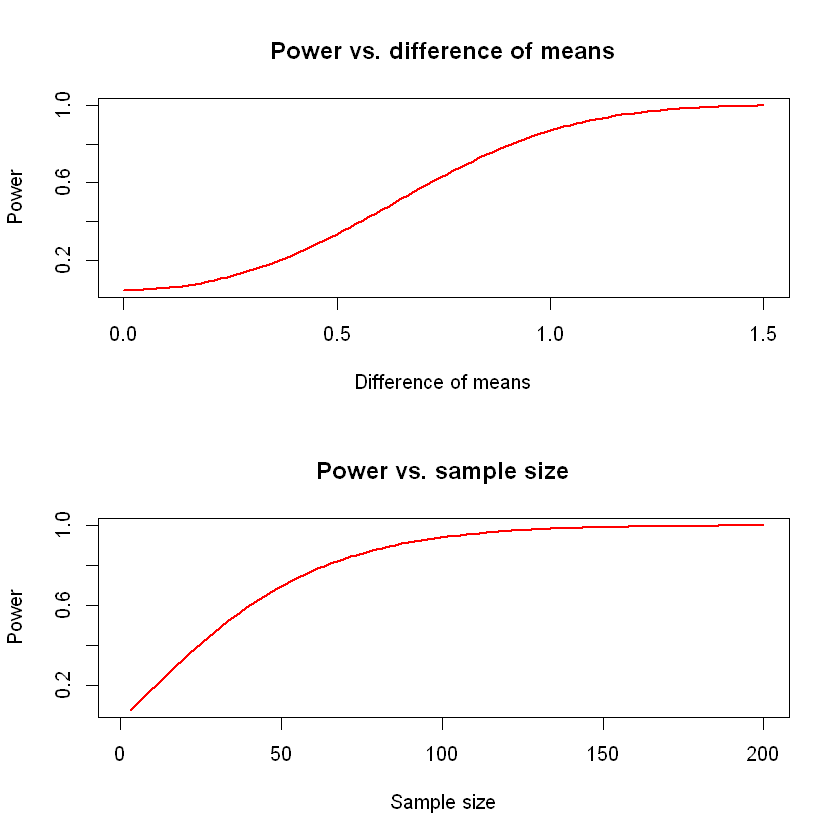

In [1]:
par(mfrow = c(2, 1))

require(pwr)

X = seq(from = 0.0, to = 1.5, length.out = 100)
powers = sapply(X, function(x) 
  pwr.t.test(n = 20, d = x, sig.level = 0.05, power = NULL,
             type = "two.sample", alternative = "two.sided")$power)

plot(X, powers, type = 'l', lwd = 2, col = 'red',
     xlab = 'Difference of means', ylab = 'Power',
     main = 'Power vs. difference of means')

X = seq(from = 1, to = 200, length.out = 100)
powers = sapply(X, function(x) 
  pwr.t.test(n = x, d = 0.5, sig.level = 0.05, power = NULL,
             type = "two.sample", alternative = "two.sided")$power)

plot(X, powers, type = 'l', lwd = 2, col = 'red',
     xlab = 'Sample size', ylab = 'Power',
     main = 'Power vs. sample size')
    
par(mfrow = c(1, 1))

### Mean Log Price by Aspiration

#### Helper plotting functions

The following functions help plot a histogram to visuallize the difference in means between aspiration groups and helps visualize power versus a range of mean differences. 

In [3]:
# Helper functions
# plot histograms showing means of two samples
plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 20){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  par(mfrow = c(2, 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols[1]), xlab = cols[1])
  abline(v = mean(a), lwd = 4, col = 'red')
  hist(b, breaks = breaks, main = paste('Histogram of', cols[2]), xlab = cols[2])
  abline(v = mean(b), lwd = 4, col = 'red')
  par(mfrow = c(1, 1))
}

# plot power function against mean difference with known sample sizes of two samples. 
plot.power.mean <- function(n1 = 100, n2 =100, sig.level =0.05, max.mean = 0.5){
  X <- seq(from = 0.0, to = max.mean, length.out = 100)
  powers <- sapply(X, function(x) 
    pwr.t2n.test(n1 = n1, n2 = n2, d = x, sig.level = sig.level, power = NULL,
               alternative = "two.sided")$power)

  plot(X, powers, type = 'l', lwd = 2, col = 'red',
       xlab = 'Mean Diff', ylab = 'Power',
       main = 'Mean Diff vs. Power')
}

#### Sample size and mean difference

From the sample sizes for both turbo and standard aspiration, we see that turbo has a relatively low sample size and could reduce power based on our brief analysis in our previous section on power. Additionally the mean difference is ~0.34, which could also generate lower power. 

In [13]:
table(auto.price$aspiration)
mean(auto.price$log.price[auto.price$aspiration == "std"]) - mean(auto.price$log.price[auto.price$aspiration == "turbo"])


  std turbo 
  159    36 

[1] -0.3388682

#### T-test aspiration

From the Welch's t-test below we see that the means of log price when stratified by aspiration are different. Our null hypothesis is that the means are the same, but since the p-value is less than 0.05 and the confidence intervals don't cross zero we can reject the null. 


	Welch Two Sample t-test

data:  log.price by aspiration
t = -4.4723, df = 66.863, p-value = 3.075e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4901126 -0.1876238
sample estimates:
  mean in group std mean in group turbo 
           9.287064            9.625932 


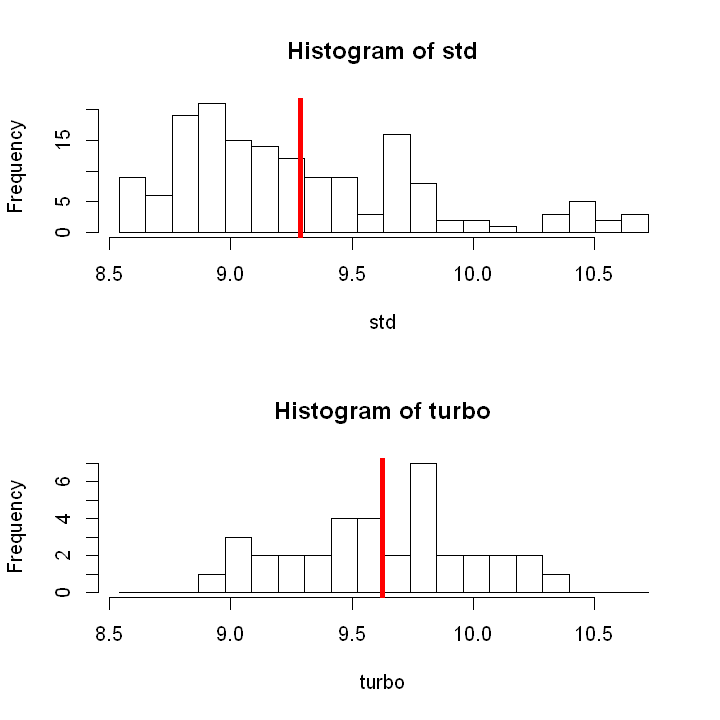

In [10]:
t.test(log.price~aspiration, data = auto.price)
plot.t(auto.price$log.price[auto.price$aspiration == "std"], 
       auto.price$log.price[auto.price$aspiration == "turbo"],
       cols = c("std", "turbo"))

#### Power of log price and aspiration

After running the t-tests on both aspiration styles, it is important to understand the power. Running a two sample power test with the sample sizes and mean differences we can see that the power (obtaining a true result when rejecting the null) is low (0.45). In fact to obtain a power of 0.9, where one minus power is the probability of a false negative, we would need a mean difference of roughly 0.7. We can see this by examining the range of differences versus power on a line plot, shown below.

In [11]:
pwr.t2n.test(n1 = length(auto.price$log.price[auto.price$aspiration == "std"]), 
             n2 = length(auto.price$log.price[auto.price$aspiration == "turbo"]), 
             d = mean(auto.price$log.price[auto.price$aspiration == "std"]) - mean(auto.price$log.price[auto.price$aspiration == "turbo"]), 
             sig.level = 0.05, power = NULL,
             alternative = "two.sided")


     t test power calculation 

             n1 = 159
             n2 = 36
              d = 0.3388682
      sig.level = 0.05
          power = 0.447117
    alternative = two.sided


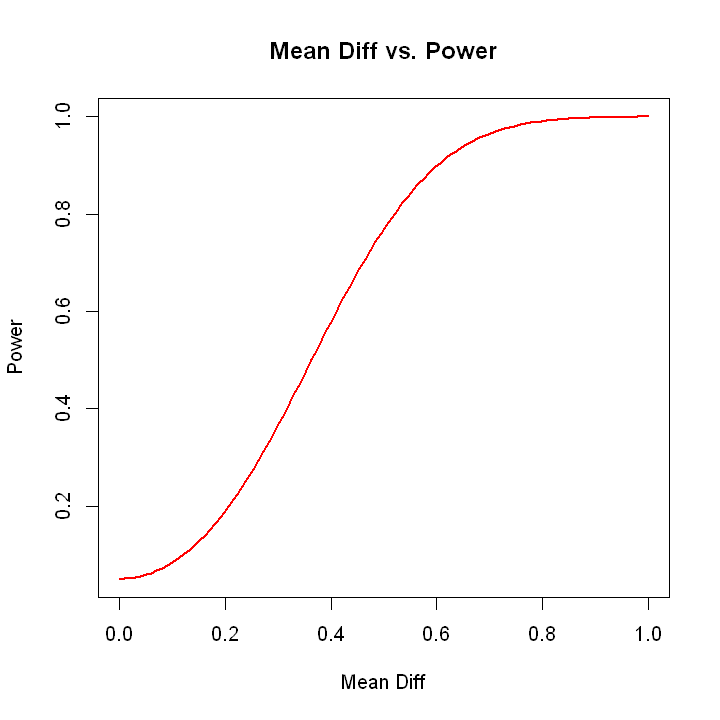

In [15]:
require(repr)
options(repr.plot.width=6, repr.plot.height=6)

plot.power.mean(n1 = length(auto.price$log.price[auto.price$aspiration == "std"]),
                n2 = length(auto.price$log.price[auto.price$aspiration == "turbo"]), max.mean = 1.0)

### Mean Log Price by Fuel Type

#### Sample size and mean difference

From the sample sizes for both gas and diesel fuel, we see that diesel has a relatively low sample size (20) and could reduce power based on our brief analysis in the power overview section. Additionally the mean difference is ~0.23, which could also generate lower power. 


In [16]:
table(auto.price$fuel.type)
abs(mean(auto.price$log.price[auto.price$fuel.type == "diesel"]) - mean(auto.price$log.price[auto.price$fuel.type == "gas"]))


diesel    gas 
    20    175 

[1] 0.2315443

#### T-tests Fuel Type

From the Welch's t-test below we see that the means of log price when stratified by fuel type are not different. Our null hypothesis is that the means are the same, and since the p-value is greater than 0.05 and the confidence intervals cross zero we can not reject the null. The means are statistically similar.


	Welch Two Sample t-test

data:  log.price by fuel.type
t = 2.0019, df = 23.942, p-value = 0.05675
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.007204235  0.470292829
sample estimates:
mean in group diesel    mean in group gas 
            9.557420             9.325876 


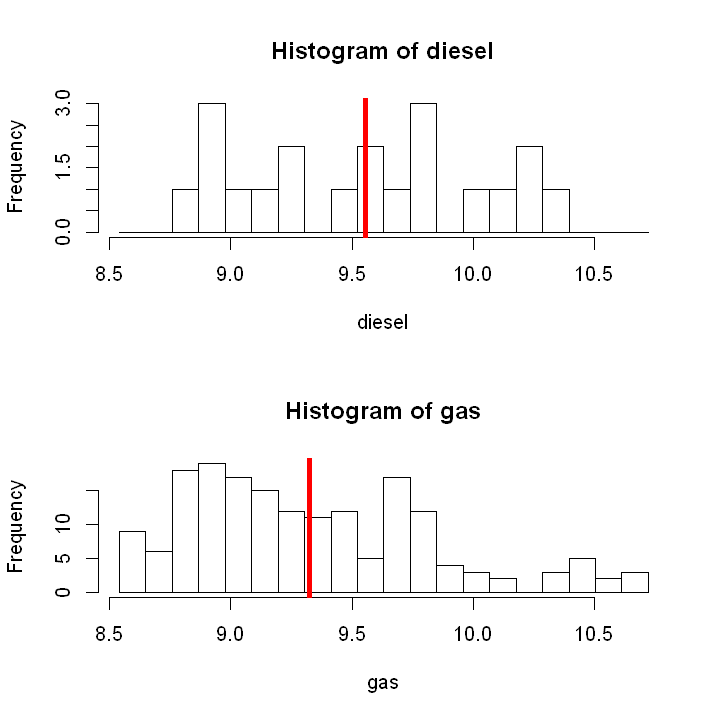

In [17]:
t.test(log.price~fuel.type, data = auto.price)
plot.t(auto.price$log.price[auto.price$fuel.type == "diesel"], 
       auto.price$log.price[auto.price$fuel.type == "gas"],
       cols = c("diesel", "gas"))

#### Power of log price and aspiration

After running the t-tests on both fuel styles, it is important to understand the power. Running a two sample power test with the sample sizes and mean differences we can see that the power (obtaining a true result when rejecting the null) is low (0.16). In fact to obtain a power of 0.9, where one minus power is the probability of a false negative, we would need a mean difference of roughly 0.8. We can see this by examining the range of differences versus power on a line plot, shown below.

In [18]:
pwr.t2n.test(n1 = length(auto.price$log.price[auto.price$fuel.type == "diesel"]), 
             n2 = length(auto.price$log.price[auto.price$fuel.type == "gas"]), 
             d = abs(mean(auto.price$log.price[auto.price$fuel.type == "diesel"]) - mean(auto.price$log.price[auto.price$fuel.type == "gas"])), 
             sig.level = 0.05, power = NULL,
             alternative = "two.sided")


     t test power calculation 

             n1 = 20
             n2 = 175
              d = 0.2315443
      sig.level = 0.05
          power = 0.1642492
    alternative = two.sided


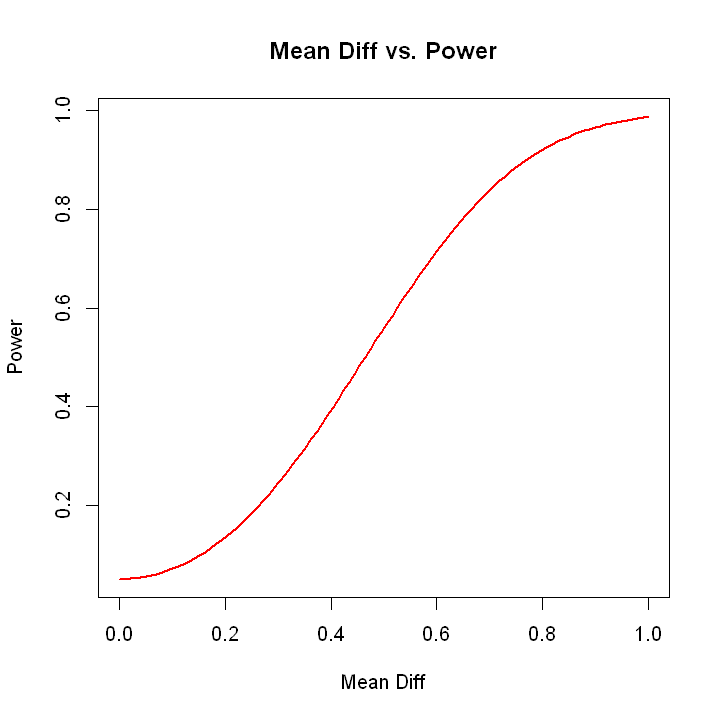

In [20]:
options(repr.plot.width=6, repr.plot.height=6)
plot.power.mean(n1 = length(auto.price$log.price[auto.price$fuel.type == "diesel"]),
                n2 = length(auto.price$log.price[auto.price$fuel.type == "gas"]), max.mean =1.0)

### Mean Log Price by Drive Wheels (fwe, rwd)

#### Sample size and mean difference

From the sample sizes for drive wheels, we see that 4wd cars have such a small sample that comparision and its subsequent power would be difficult. Here we will remove 4wd cars from the analysis. The sample size and mean difference between rwd and fwd are high compared to other groups and should generate higher power.

In [22]:
table(auto.price$drive.wheels)
abs(mean(auto.price$log.price[auto.price$drive.wheels == "fwd"]) - mean(auto.price$log.price[auto.price$drive.wheels == "rwd"]))


4wd fwd rwd 
  8 116  71 

[1] 0.7377424

#### T-tests Fuel Type

From the Welch's t-test below we see that the means of log price when stratified by fwd and rwd type are  different. Our null hypothesis is that the means are the same, and since the p-value is less than 0.05 and the confidence intervals don't cross zero we can reject the null. We can accept that the means are different.


	Welch Two Sample t-test

data:  log.price by drive.wheels
t = -12.233, df = 115.43, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8571999 -0.6182849
sample estimates:
mean in group fwd mean in group rwd 
         9.076065          9.813807 


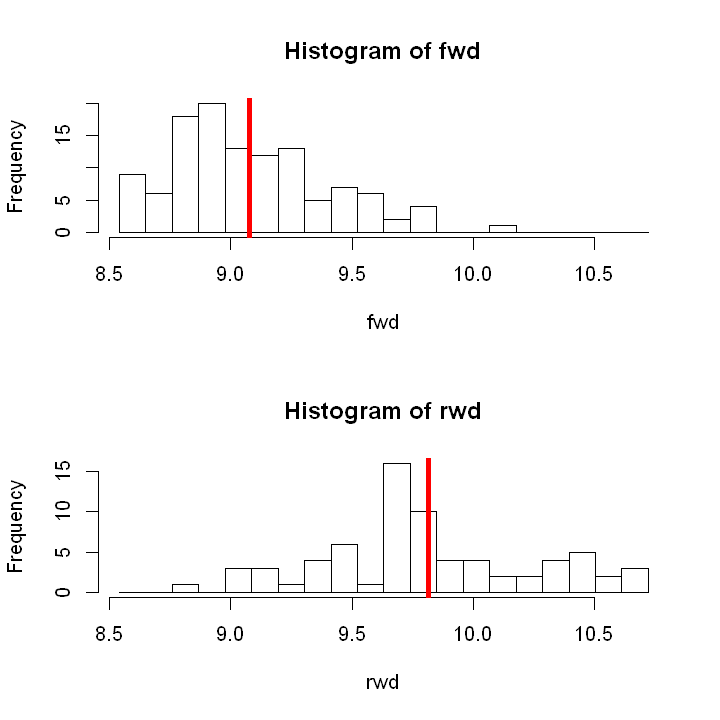

In [23]:
t.test(log.price~drive.wheels, data = auto.price[auto.price$drive.wheels != "4wd",])
plot.t(auto.price$log.price[auto.price$drive.wheels == "fwd"], 
       auto.price$log.price[auto.price$drive.wheels == "rwd"],
       cols = c("fwd", "rwd"))

#### Power of log price and fwd/rwd

After running the t-tests on both drive wheel styles, it is important to understand the power. Running a two sample power test with the sample sizes and mean differences we can see that the power (obtaining a true result when rejecting the null) is very high (0.998) and higher than the other comparisons. This means there is a 0.2% probability that we would get a type II error (false negative). From the mean diff vs. power plot a mean differenece above 0.8 would further increase power to nearly 1.0.

In [24]:
pwr.t2n.test(n1 = length(auto.price$log.price[auto.price$drive.wheels == "fwd"]), 
             n2 = length(auto.price$log.price[auto.price$drive.wheels == "rwd"]), 
             d = abs(mean(auto.price$log.price[auto.price$drive.wheels == "fwd"]) - mean(auto.price$log.price[auto.price$drive.wheels == "rwd"])), 
             sig.level = 0.05, power = NULL,
             alternative = "two.sided")


     t test power calculation 

             n1 = 116
             n2 = 71
              d = 0.7377424
      sig.level = 0.05
          power = 0.9981957
    alternative = two.sided


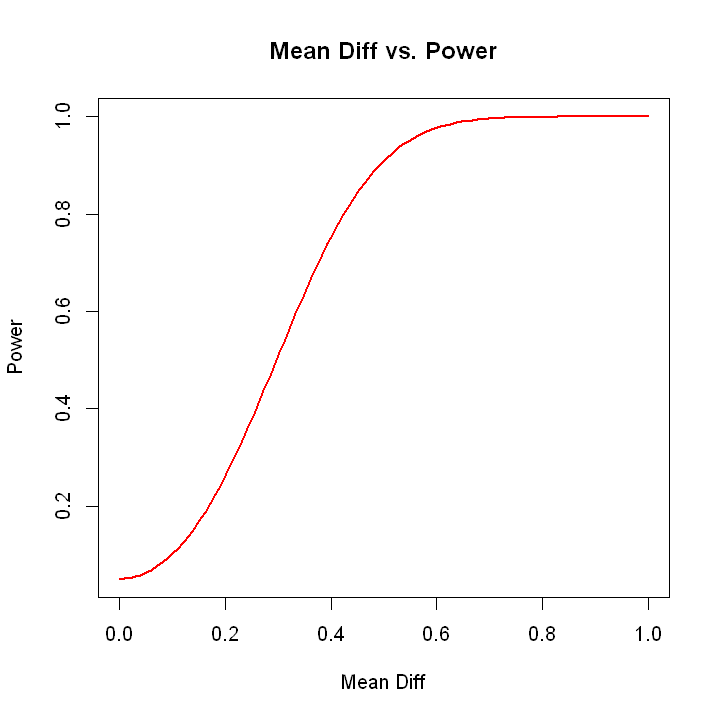

In [25]:
plot.power.mean(n1 = length(auto.price$log.price[auto.price$drive.wheels == "fwd"]),
                n2 = length(auto.price$log.price[auto.price$drive.wheels == "rwd"]), max.mean = 1.0)

### ANOVA and Tukey HSD on log price and body style

Anova and Tukey tests help us compare means when there are more than 2 groups or degrees of freedom are greater than one. In this section we'll examine log price against groups of body styles, but first we'll remove styles that will have low expected power.

#### Remove low power body styles

When examining the sample sizes and log price means within groups, we can see that convertibles and hardtops have really low sample size (6, 8) and mean difference that is extremely low(~0.1). Additionally it would take a really high mean difference (>2.0) and/or more samples to obtain more desiriable power. Because of this we will remove these groups from our analysis, and only continue with hatchbacks, sedans, and wagons.


In [26]:
table(auto.price$body.style)
aggregate(auto.price$log.price, list(auto.price$body.style), mean)


convertible     hardtop   hatchback       sedan       wagon 
          6           8          63          94          24 

Group.1,x
convertible,9.890536
hardtop,9.793886
hatchback,9.105165
sedan,9.438602
wagon,9.359517


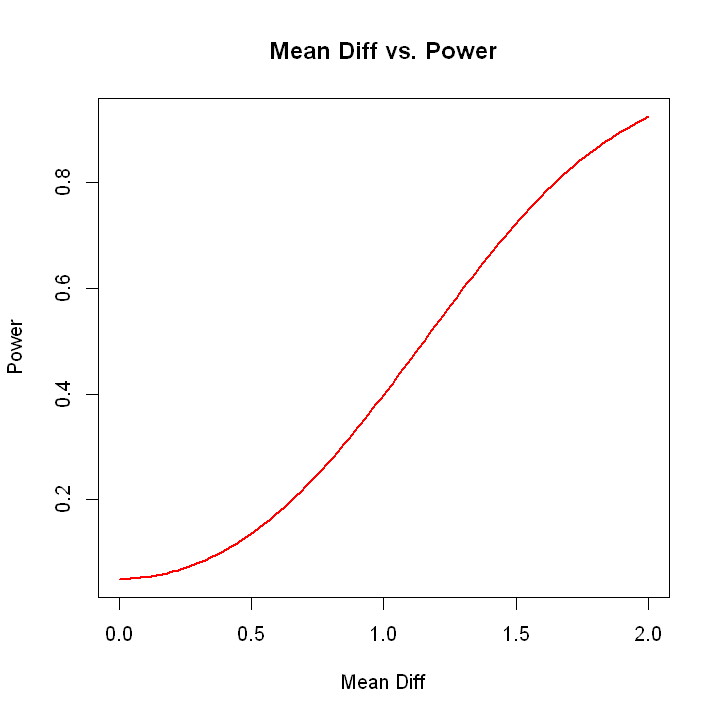

In [28]:
plot.power.mean(n1 = length(auto.price$log.price[auto.price$body.style == "convertible"]),
                n2 = length(auto.price$log.price[auto.price$body.style == "hardtop"]), max.mean = 2.0)

In [29]:
# remove low samples from auto.price.
auto.price$body.style <- factor(auto.price$body.style)

auto.price.sub <- auto.price[!(auto.price$body.style) %in% c("convertible", "hardtop"),]

#### Visual comparison

From the boxplots below we see that there could be a difference in means between sedans and hatchbacks, but it is too hard to discern any difference between sedans and wagons. Hatchbacks could have a mean different from wagons, as well, but since wagons have a low sample size we'll need to run an ANOVA and Tukey to be sure.

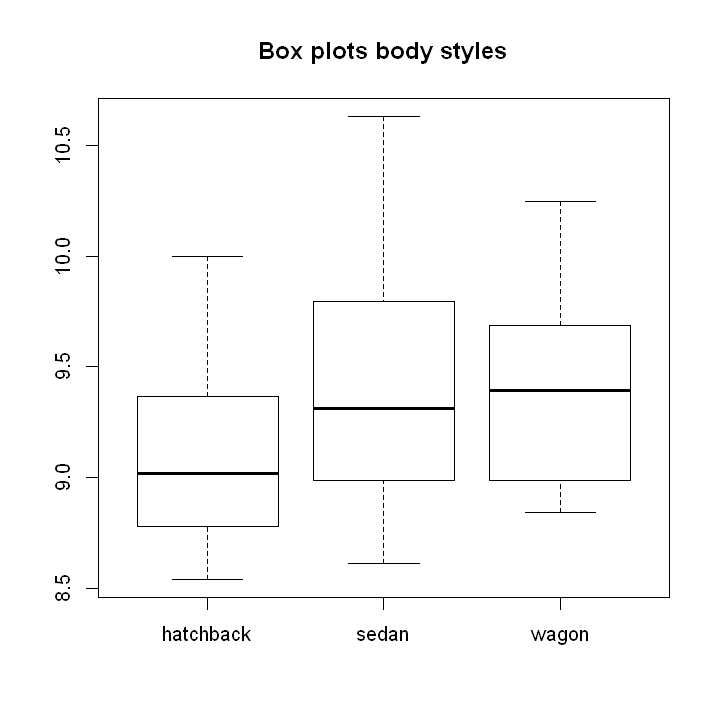

In [30]:
auto.price.sub$body.style <- factor(auto.price.sub$body.style)
boxplot(auto.price.sub$log.price ~ auto.price.sub$body.style, main = "Box plots body styles")

#### ANOVA

The ANOVA helps us compare log.price in higher than 2 degree of freedom groups. In an anova we are testing to see if the grouped samples are from the same population or if at least one is from another population. When we run the ANOVA, we see that the p-value (Pr >F) is less than 0.05. This means we can reject the null (all samples are from the same population) and accept the alternative (at least one is from a different population). The Tukey HSD will help determine which specific group is different.

In [31]:
auto.sub_aov = aov(log.price ~ body.style, data = auto.price.sub)
summary(auto.sub_aov)
print(auto.sub_aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
body.style    2   4.26  2.1280   10.07 7.17e-05 ***
Residuals   178  37.60  0.2113                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Call:
   aov(formula = log.price ~ body.style, data = auto.price.sub)

Terms:
                body.style Residuals
Sum of Squares     4.25600  37.60412
Deg. of Freedom          2       178

Residual standard error: 0.4596293
Estimated effects may be unbalanced


#### Tukey HSD - Log price to Body Style

This test looks at the mean differences, confidence intervals, and p-values of each comparison group. From the table and plot below we see that the mean difference between sedan and hatchback is different since the confidence intervals don't cross zero. The other comparisons don't show statistically siginificant mean differences, their p-values are greater thant 0.05 and the intervals overlap zero.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log.price ~ body.style, data = auto.price.sub)

$body.style
                      diff          lwr       upr     p adj
sedan-hatchback  0.3334366  0.156557631 0.5103156 0.0000438
wagon-hatchback  0.2543519 -0.006230054 0.5149339 0.0573985
wagon-sedan     -0.0790847 -0.327530761 0.1693614 0.7326102


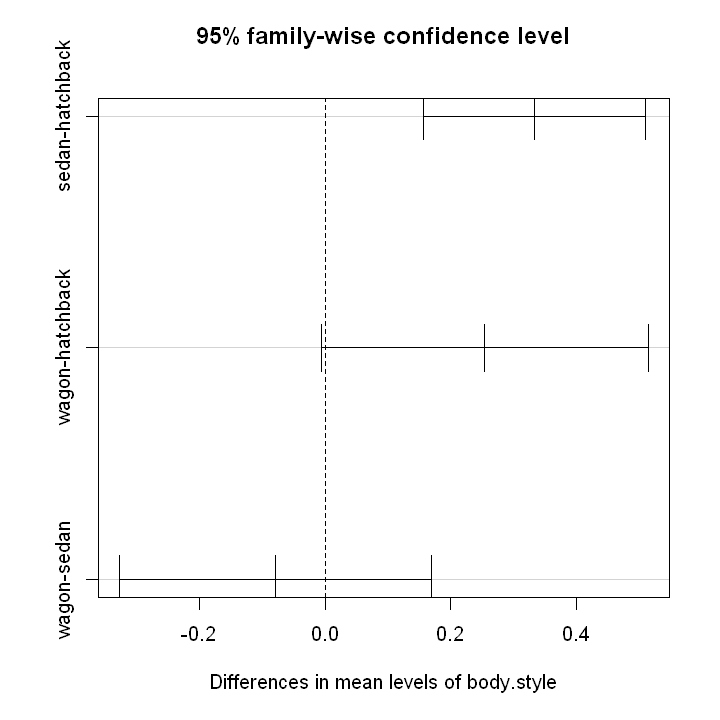

In [32]:
tukey_anova = TukeyHSD(auto.sub_aov)  # Tukey's Range test:
tukey_anova

plot(tukey_anova)